In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report

# General plotting style
sns.set(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (10, 6)

In [10]:
df = pd.read_excel("cleaned_data/cleaned_table_1d.xlsx")
df.head(250)

,CCG Code,CCG Name,Referrals finishing a course of treatment(5),Depression,Anxiety and stress related disorders (Total),Agoraphobia,Generalized anxiety disorder,Mixed anxiety and depressive disorder,Obsessive-compulsive disorder,Other anxiety or stress related disorder,Panic disorder (episodic paroxysmal anxiety),Post-traumatic stress disorder,Social phobias,Specific (isolated) phobias,Other Mental Health problems,Other recorded problems,Unspecified
0,00C,NHS Darlington CCG,885,1.4,5.5,*,0.9,2.5,*,*,0.6,*,*,*,1.6,*,91.5
1,00D,"NHS Durham Dales, Easington and Sedgefield CCG",2220,1.6,6.3,*,1.1,4.3,0.2,*,0.3,0.2,*,*,0.6,*,91.4
2,00F,NHS Gateshead CCG,3150,13.2,52.9,0.9,11.2,29.6,1.6,0.6,3.5,2.2,2.6,0.8,2.1,1.5,23.6
3,00G,NHS Newcastle North and East CCG,1745,19.1,53.2,0.5,21.9,18.6,1.9,4.6,1.6,2,2,*,2.5,1.9,23.2
4,00H,NHS Newcastle West CCG,1210,17.6,52.1,1.2,18.1,19.8,1.8,3.4,2.3,2.7,2.8,*,2.4,1.3,26.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,99M,NHS North East Hampshire and Farnham CCG,1785,20.3,67.3,0.6,4.4,53,2.1,2.5,1.7,1.3,0.8,0.9,3.3,1.6,7.6
210,99N,NHS Wiltshire CCG,5455,7.4,8.9,0.2,3.4,2.3,0.4,0.3,0.6,1,0.4,0.3,1.2,1.5,80.9
211,99P,"NHS Northern, Eastern and Western Devon CCG",8105,23.6,36.1,1.2,10.8,12.7,1.9,0.3,3.1,2.5,2.9,0.8,2.5,0.3,37.5
212,99Q,NHS South Devon and Torbay CCG,2820,25.4,59.8,2,13.5,24.1,3,0.5,4.7,6.5,4.3,1.3,2.7,*,57.6


In [11]:
# Rename the long "Referrals finishing..." column to a simpler name
old_col_name = "Referrals finishing a course of treatment(5)"
new_col_name = "Referrals_finished"

df.rename(columns={old_col_name: new_col_name}, inplace=True)

# List of diagnostic columns (all except ID/name and Referrals_finished)
id_cols = ["CCG Code", "CCG Name"]
diag_cols = [c for c in df.columns if c not in id_cols + [new_col_name]]

df.head(250)

,CCG Code,CCG Name,Referrals_finished,Depression,Anxiety and stress related disorders (Total),Agoraphobia,Generalized anxiety disorder,Mixed anxiety and depressive disorder,Obsessive-compulsive disorder,Other anxiety or stress related disorder,Panic disorder (episodic paroxysmal anxiety),Post-traumatic stress disorder,Social phobias,Specific (isolated) phobias,Other Mental Health problems,Other recorded problems,Unspecified
0,00C,NHS Darlington CCG,885,1.4,5.5,*,0.9,2.5,*,*,0.6,*,*,*,1.6,*,91.5
1,00D,"NHS Durham Dales, Easington and Sedgefield CCG",2220,1.6,6.3,*,1.1,4.3,0.2,*,0.3,0.2,*,*,0.6,*,91.4
2,00F,NHS Gateshead CCG,3150,13.2,52.9,0.9,11.2,29.6,1.6,0.6,3.5,2.2,2.6,0.8,2.1,1.5,23.6
3,00G,NHS Newcastle North and East CCG,1745,19.1,53.2,0.5,21.9,18.6,1.9,4.6,1.6,2,2,*,2.5,1.9,23.2
4,00H,NHS Newcastle West CCG,1210,17.6,52.1,1.2,18.1,19.8,1.8,3.4,2.3,2.7,2.8,*,2.4,1.3,26.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,99M,NHS North East Hampshire and Farnham CCG,1785,20.3,67.3,0.6,4.4,53,2.1,2.5,1.7,1.3,0.8,0.9,3.3,1.6,7.6
210,99N,NHS Wiltshire CCG,5455,7.4,8.9,0.2,3.4,2.3,0.4,0.3,0.6,1,0.4,0.3,1.2,1.5,80.9
211,99P,"NHS Northern, Eastern and Western Devon CCG",8105,23.6,36.1,1.2,10.8,12.7,1.9,0.3,3.1,2.5,2.9,0.8,2.5,0.3,37.5
212,99Q,NHS South Devon and Torbay CCG,2820,25.4,59.8,2,13.5,24.1,3,0.5,4.7,6.5,4.3,1.3,2.7,*,57.6


In [12]:
for col in diag_cols:
    df[col] = (
        df[col]
        .replace("*", np.nan)     # suppressed small numbers -> NaN
        .astype(str)
        .str.strip()
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

/tmp/ipykernel_4557/1242122106.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace("*", np.nan)     # suppressed small numbers -> NaN
/tmp/ipykernel_4557/1242122106.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace("*", np.nan)     # suppressed small numbers -> NaN
/tmp/ipykernel_4557/1242122106.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behav

In [13]:
df.head(250)

,CCG Code,CCG Name,Referrals_finished,Depression,Anxiety and stress related disorders (Total),Agoraphobia,Generalized anxiety disorder,Mixed anxiety and depressive disorder,Obsessive-compulsive disorder,Other anxiety or stress related disorder,Panic disorder (episodic paroxysmal anxiety),Post-traumatic stress disorder,Social phobias,Specific (isolated) phobias,Other Mental Health problems,Other recorded problems,Unspecified
0,00C,NHS Darlington CCG,885,1.4,5.5,NaN,0.9,2.5,NaN,NaN,0.6,NaN,NaN,NaN,1.6,NaN,91.5
1,00D,"NHS Durham Dales, Easington and Sedgefield CCG",2220,1.6,6.3,NaN,1.1,4.3,0.2,NaN,0.3,0.2,NaN,NaN,0.6,NaN,91.4
2,00F,NHS Gateshead CCG,3150,13.2,52.9,0.9,11.2,29.6,1.6,0.6,3.5,2.2,2.6,0.8,2.1,1.5,23.6
3,00G,NHS Newcastle North and East CCG,1745,19.1,53.2,0.5,21.9,18.6,1.9,4.6,1.6,2.0,2.0,NaN,2.5,1.9,23.2
4,00H,NHS Newcastle West CCG,1210,17.6,52.1,1.2,18.1,19.8,1.8,3.4,2.3,2.7,2.8,NaN,2.4,1.3,26.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,99M,NHS North East Hampshire and Farnham CCG,1785,20.3,67.3,0.6,4.4,53.0,2.1,2.5,1.7,1.3,0.8,0.9,3.3,1.6,7.6
210,99N,NHS Wiltshire CCG,5455,7.4,8.9,0.2,3.4,2.3,0.4,0.3,0.6,1.0,0.4,0.3,1.2,1.5,80.9
211,99P,"NHS Northern, Eastern and Western Devon CCG",8105,23.6,36.1,1.2,10.8,12.7,1.9,0.3,3.1,2.5,2.9,0.8,2.5,0.3,37.5
212,99Q,NHS South Devon and Torbay CCG,2820,25.4,59.8,2.0,13.5,24.1,3.0,0.5,4.7,6.5,4.3,1.3,2.7,NaN,57.6


In [14]:
#Drop Unspecified column
#df.drop(columns=["Unspecified"], inplace=True)
# Row-wise sum of diagnostic percentages
df["diag_percent_sum"] = df[diag_cols].sum(axis=1)

print("Summary of row-wise sum of diagnostic percentages:")
df.head(250)

Summary of row-wise sum of diagnostic percentages:


,CCG Code,CCG Name,Referrals_finished,Depression,Anxiety and stress related disorders (Total),Agoraphobia,Generalized anxiety disorder,Mixed anxiety and depressive disorder,Obsessive-compulsive disorder,Other anxiety or stress related disorder,Panic disorder (episodic paroxysmal anxiety),Post-traumatic stress disorder,Social phobias,Specific (isolated) phobias,Other Mental Health problems,Other recorded problems,Unspecified,diag_percent_sum
0,00C,NHS Darlington CCG,885,1.4,5.5,NaN,0.9,2.5,NaN,NaN,0.6,NaN,NaN,NaN,1.6,NaN,91.5,104.0
1,00D,"NHS Durham Dales, Easington and Sedgefield CCG",2220,1.6,6.3,NaN,1.1,4.3,0.2,NaN,0.3,0.2,NaN,NaN,0.6,NaN,91.4,106.0
2,00F,NHS Gateshead CCG,3150,13.2,52.9,0.9,11.2,29.6,1.6,0.6,3.5,2.2,2.6,0.8,2.1,1.5,23.6,146.3
3,00G,NHS Newcastle North and East CCG,1745,19.1,53.2,0.5,21.9,18.6,1.9,4.6,1.6,2.0,2.0,NaN,2.5,1.9,23.2,153.0
4,00H,NHS Newcastle West CCG,1210,17.6,52.1,1.2,18.1,19.8,1.8,3.4,2.3,2.7,2.8,NaN,2.4,1.3,26.5,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,99M,NHS North East Hampshire and Farnham CCG,1785,20.3,67.3,0.6,4.4,53.0,2.1,2.5,1.7,1.3,0.8,0.9,3.3,1.6,7.6,167.4
210,99N,NHS Wiltshire CCG,5455,7.4,8.9,0.2,3.4,2.3,0.4,0.3,0.6,1.0,0.4,0.3,1.2,1.5,80.9,108.8
211,99P,"NHS Northern, Eastern and Western Devon CCG",8105,23.6,36.1,1.2,10.8,12.7,1.9,0.3,3.1,2.5,2.9,0.8,2.5,0.3,37.5,136.2
212,99Q,NHS South Devon and Torbay CCG,2820,25.4,59.8,2.0,13.5,24.1,3.0,0.5,4.7,6.5,4.3,1.3,2.7,NaN,57.6,205.4


In [8]:
# Count missing values per diagnostic column
missing_counts = df[diag_cols].isna().sum().sort_values(ascending=False)
print("Missing values per diagnostic column:")
print(missing_counts)

# %%
# Proportion of missing per column
missing_prop = missing_counts / len(df)
missing_prop

Missing values per diagnostic column:
Other recorded problems                         97
Other anxiety or stress related disorder        86
Agoraphobia                                     67
Specific (isolated) phobias                     57
Panic disorder (episodic paroxysmal anxiety)    37
Social phobias                                  25
Unspecified                                     21
Post-traumatic stress disorder                  19
Obsessive-compulsive disorder                   18
Other Mental Health problems                    15
Depression                                      10
Generalized anxiety disorder                     9
Mixed anxiety and depressive disorder            5
Anxiety and stress related disorders (Total)     4
dtype: int64


Other recorded problems                         0.453271
Other anxiety or stress related disorder        0.401869
Agoraphobia                                     0.313084
Specific (isolated) phobias                     0.266355
Panic disorder (episodic paroxysmal anxiety)    0.172897
Social phobias                                  0.116822
Unspecified                                     0.098131
Post-traumatic stress disorder                  0.088785
Obsessive-compulsive disorder                   0.084112
Other Mental Health problems                    0.070093
Depression                                      0.046729
Generalized anxiety disorder                    0.042056
Mixed anxiety and depressive disorder           0.023364
Anxiety and stress related disorders (Total)    0.018692
dtype: float64

In [16]:
# Proportion of missing per column
missing_prop = missing_counts / len(df) * 100
missing_prop

Other recorded problems                         45.327103
Other anxiety or stress related disorder        40.186916
Agoraphobia                                     31.308411
Specific (isolated) phobias                     26.635514
Panic disorder (episodic paroxysmal anxiety)    17.289720
Social phobias                                  11.682243
Unspecified                                      9.813084
Post-traumatic stress disorder                   8.878505
Obsessive-compulsive disorder                    8.411215
Other Mental Health problems                     7.009346
Depression                                       4.672897
Generalized anxiety disorder                     4.205607
Mixed anxiety and depressive disorder            2.336449
Anxiety and stress related disorders (Total)     1.869159
dtype: float64

In [17]:
count_cols = []

for col in diag_cols:
    count_col = col + "_count"
    df[count_col] = df[new_col_name] * (df[col] / 100.0)
    count_cols.append(count_col)

# Quick check
df[[new_col_name] + diag_cols[:5] + count_cols[:5]].head()

,Referrals_finished,Depression,Anxiety and stress related disorders (Total),Agoraphobia,Generalized anxiety disorder,Mixed anxiety and depressive disorder,Depression_count,Anxiety and stress related disorders (Total)_count,Agoraphobia_count,Generalized anxiety disorder_count,Mixed anxiety and depressive disorder_count
0,885,1.4,5.5,NaN,0.9,2.5,12.390,48.675,NaN,7.965,22.125
1,2220,1.6,6.3,NaN,1.1,4.3,35.520,139.860,NaN,24.420,95.460
2,3150,13.2,52.9,0.9,11.2,29.6,415.800,1666.350,28.350,352.800,932.400
3,1745,19.1,53.2,0.5,21.9,18.6,333.295,928.340,8.725,382.155,324.570
4,1210,17.6,52.1,1.2,18.1,19.8,212.960,630.410,14.520,219.010,239.580


Total finished referrals (approx.): 468870


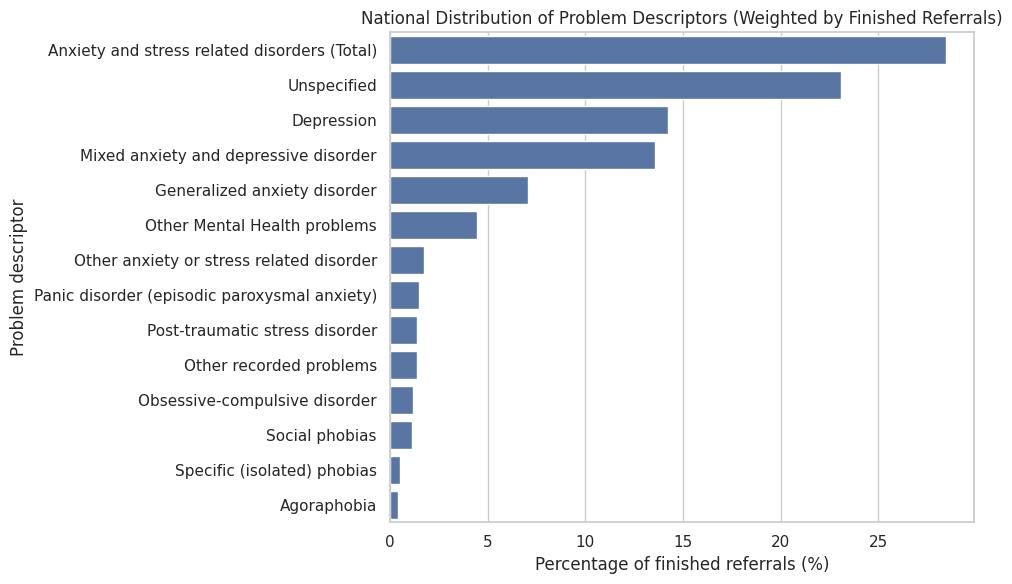

In [18]:
# Total number of finished referrals nationally
total_finished = df[new_col_name].sum()
print("Total finished referrals (approx.):", int(total_finished))

# Compute national counts by summing approximate counts
national_counts = df[count_cols].sum()

# Convert to percentages (across all problem categories)
national_percentages = (national_counts / national_counts.sum()) * 100

# Put into a tidy DataFrame
national_profile = (
    pd.DataFrame({
        "Diagnosis": [c.replace("_count", "") for c in national_counts.index],
        "National_percent": national_percentages.values
    })
    .sort_values("National_percent", ascending=False)
    .reset_index(drop=True)
)

national_profile

# %%
# Bar plot of national diagnosis percentages
plt.figure()
sns.barplot(
    data=national_profile,
    x="National_percent",
    y="Diagnosis",
    orient="h"
)
plt.title("National Distribution of Problem Descriptors (Weighted by Finished Referrals)")
plt.xlabel("Percentage of finished referrals (%)")
plt.ylabel("Problem descriptor")
plt.tight_layout()
plt.show()

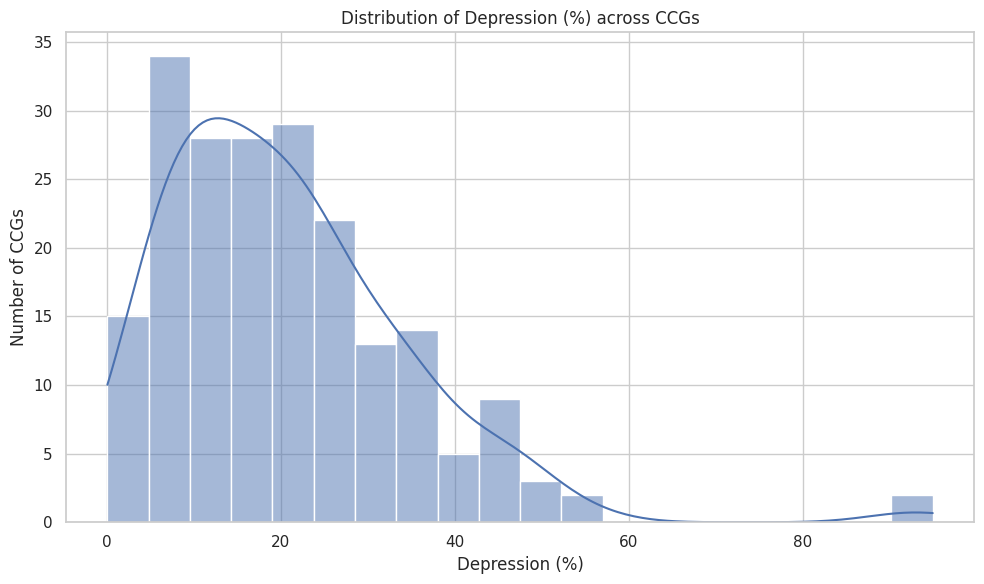

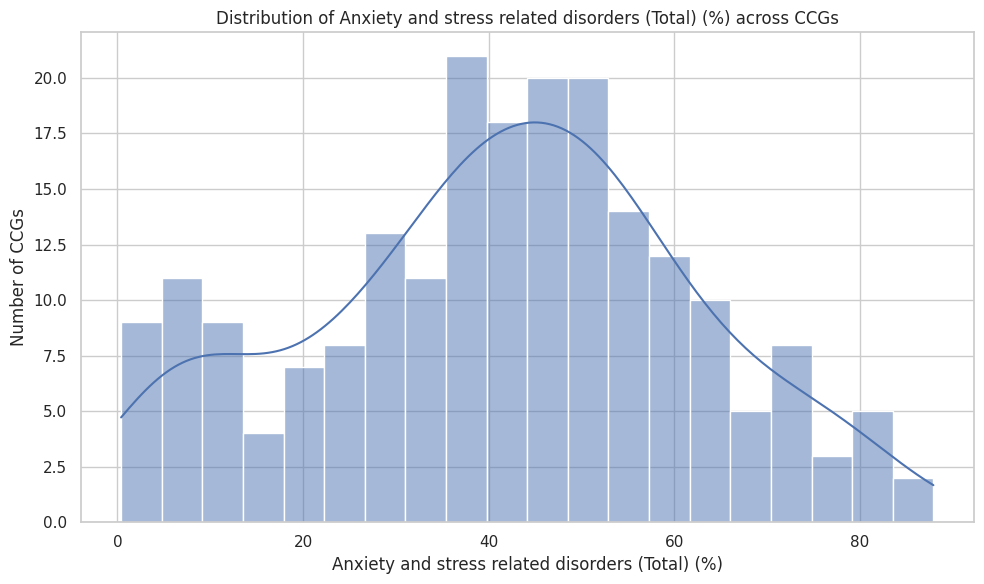

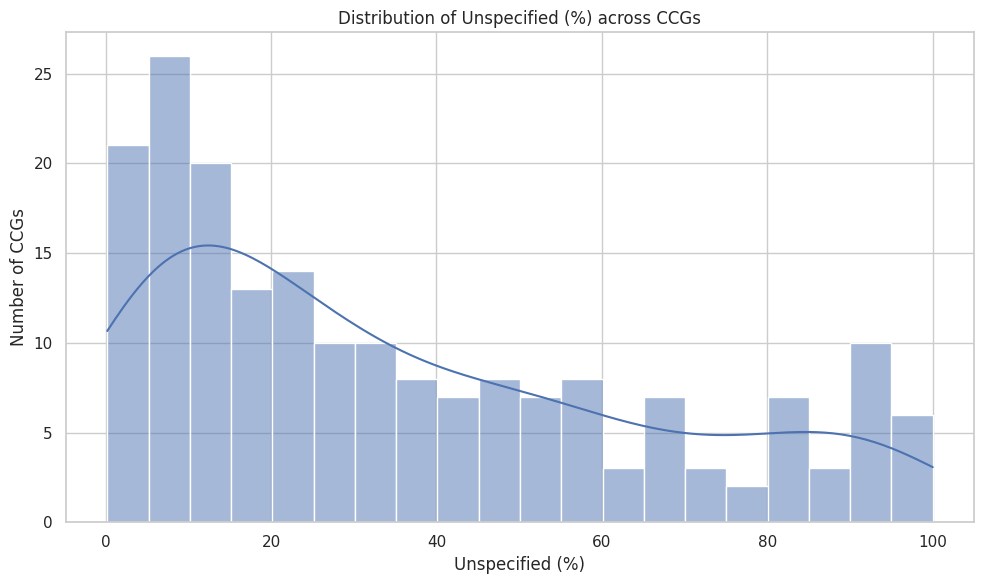

<Figure size 1000x600 with 0 Axes>

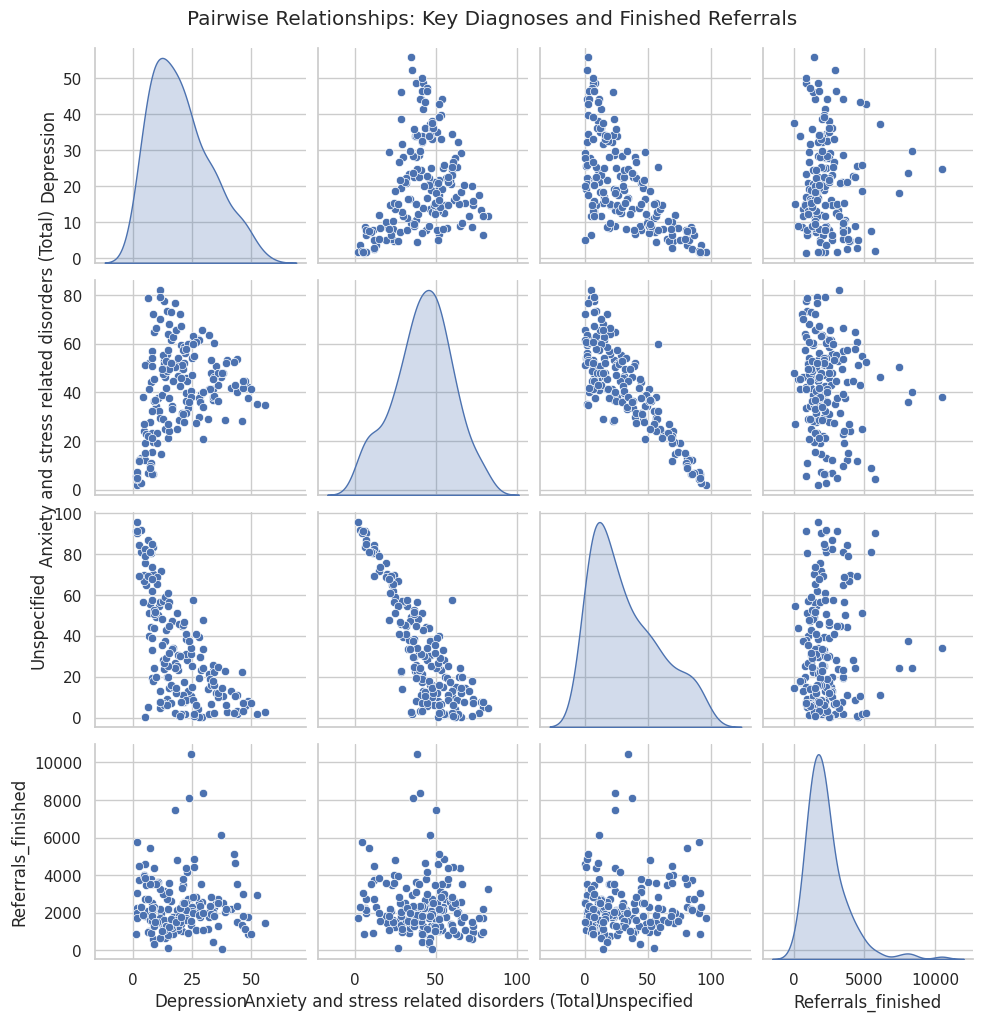

In [19]:
key_diags = [
    "Depression",
    "Anxiety and stress related disorders (Total)",
    "Unspecified"
]

for col in key_diags:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col} (%) across CCGs")
    plt.xlabel(f"{col} (%)")
    plt.ylabel("Number of CCGs")
    plt.tight_layout()
    plt.show()

# %%
# Pairwise relationships between a few key diagnoses
plt.figure()
sns.pairplot(
    df[key_diags + [new_col_name]].dropna(),
    diag_kind="kde"
)
plt.suptitle("Pairwise Relationships: Key Diagnoses and Finished Referrals", y=1.02)
plt.show()

In [20]:
def show_top_bottom(df_in, col, n=10):
    print(f"\n=== Top {n} CCGs by {col} (%) ===")
    display(
        df_in[["CCG Name", col]]
        .sort_values(col, ascending=False)
        .head(n)
    )
    print(f"\n=== Bottom {n} CCGs by {col} (%) ===")
    display(
        df_in[["CCG Name", col]]
        .sort_values(col, ascending=True)
        .head(n)
    )

for col in ["Depression", "Unspecified"]:
    show_top_bottom(df, col, n=10)


=== Top 10 CCGs by Depression (%) ===


,CCG Name,Depression
143,NHS Redbridge CCG,94.9
136,NHS Havering CCG,91.0
121,NHS Barking and Dagenham CCG,55.7
38,NHS West Cheshire CCG,52.3
180,NHS South Eastern Hampshire CCG,49.9
153,NHS Ashford CCG,48.7
172,NHS North Hampshire CCG,48.6
173,NHS Fareham and Gosport CCG,47.2
183,NHS Aylesbury Vale CCG,46.4
184,NHS West Hampshire CCG,46.3



=== Bottom 10 CCGs by Depression (%) ===


,CCG Name,Depression
193,NHS Somerset CCG,0.1
0,NHS Darlington CCG,1.4
194,NHS South Gloucestershire CCG,1.6
1,"NHS Durham Dales, Easington and Sedgefield CCG",1.6
5,NHS North Durham CCG,1.8
154,NHS Brighton and Hove CCG,1.8
188,NHS Bristol CCG,1.9
55,NHS Hull CCG,2.6
190,NHS Gloucestershire CCG,2.8
35,NHS Trafford CCG,3.5



=== Top 10 CCGs by Unspecified (%) ===


,CCG Name,Unspecified
88,NHS East Staffordshire CCG,100.0
96,NHS South East Staffordshire and Seisdon Penin...,99.6
99,NHS Stafford and Surrounds CCG,98.7
85,NHS Cannock Chase CCG,97.3
118,NHS West Essex CCG,97.3
154,NHS Brighton and Hove CCG,95.9
166,NHS South Kent Coast CCG,92.0
89,NHS Herefordshire CCG,91.7
66,NHS Corby CCG,91.6
0,NHS Darlington CCG,91.5



=== Bottom 10 CCGs by Unspecified (%) ===


,CCG Name,Unspecified
62,NHS Sheffield CCG,0.2
46,NHS Calderdale CCG,0.2
105,NHS Bedfordshire CCG,0.2
192,NHS North Somerset CCG,0.6
106,NHS Cambridgeshire and Peterborough CCG,1.0
36,NHS Vale Royal CCG,1.3
40,NHS Wigan Borough CCG,1.5
38,NHS West Cheshire CCG,1.6
29,NHS South Cheshire CCG,1.6
19,NHS Eastern Cheshire CCG,1.6


In [22]:
# Features for clustering: all diagnostic percentage columns
X_diag = df[diag_cols].copy()

# Drop rows with all-NaN diagnostic data (if any)
non_empty_mask = ~X_diag.isna().all(axis=1)
X_diag = X_diag[non_empty_mask]
df_cluster = df.loc[non_empty_mask].reset_index(drop=True)
X_diag = X_diag.reset_index(drop=True)

print("Shape of feature matrix for clustering:", X_diag.shape)

Shape of feature matrix for clustering: (214, 14)


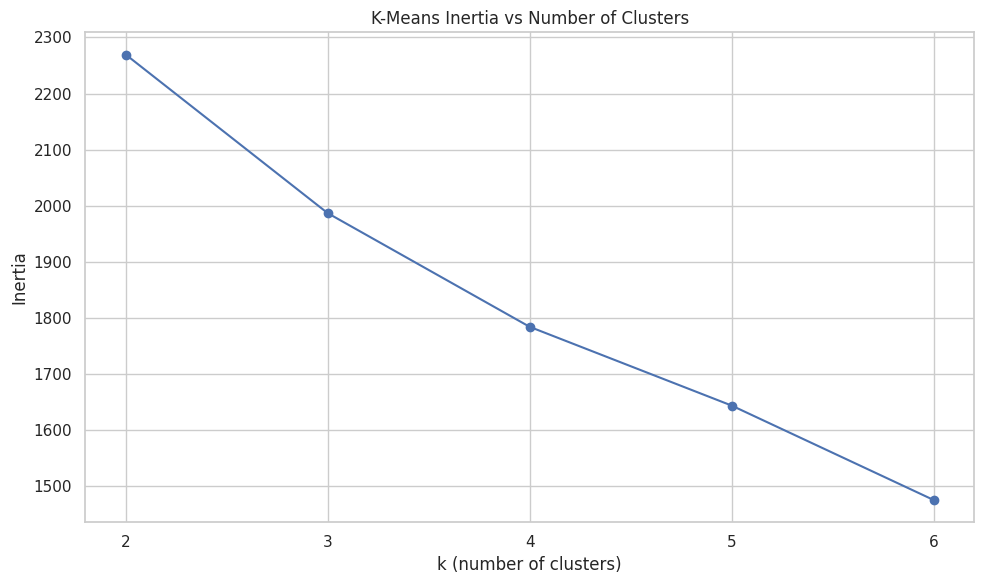

In [24]:
# %%
# Standardise features
scaler = StandardScaler()

# Handle NaN values by imputing with the mean of each column
X_diag_imputed = X_diag.fillna(X_diag.mean())

X_scaled = scaler.fit_transform(X_diag_imputed)

# %%
# Choose number of clusters (k)
# We can inspect inertia to get a rough idea (elbow method)

inertias = []
k_values = range(2, 7)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(k_values, inertias, marker="o")
plt.title("K-Means Inertia vs Number of Clusters")
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.tight_layout()
plt.show()

Cluster sizes:
Cluster
0    79
1    55
2    80
Name: count, dtype: int64


<Figure size 1200x700 with 0 Axes>

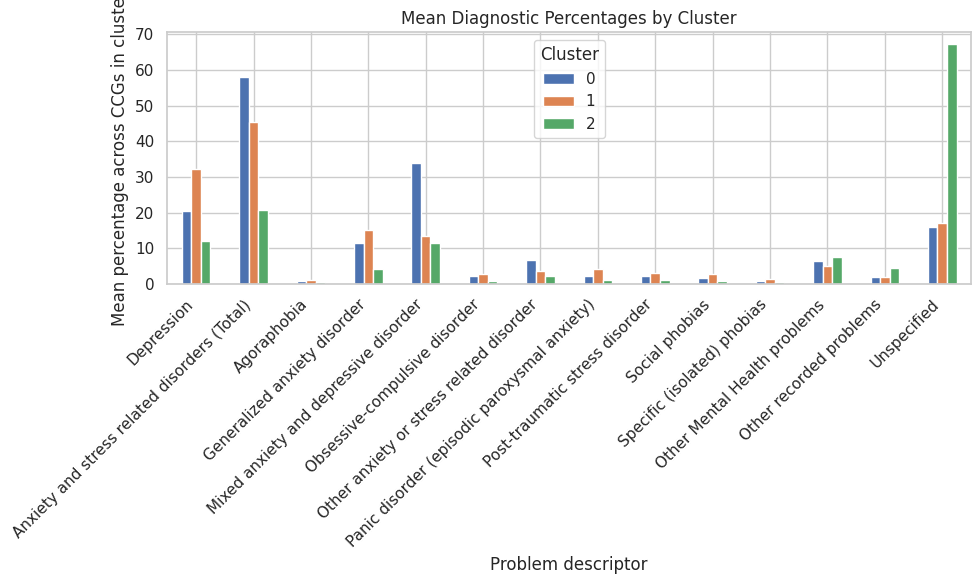

In [25]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

df_cluster["Cluster"] = cluster_labels

df_cluster[["CCG Name", "Cluster"]].head()


# %%
# Explore cluster sizes
cluster_counts = df_cluster["Cluster"].value_counts().sort_index()
print("Cluster sizes:")
print(cluster_counts)

# %%
# Compute cluster-level mean diagnostic profiles
cluster_profiles = (
    df_cluster.groupby("Cluster")[diag_cols]
    .mean()
    .T  # transpose: rows=diagnoses, cols=clusters
)

cluster_profiles

# %%
# Visualise cluster profiles as grouped bar chart
plt.figure(figsize=(12, 7))
cluster_profiles.plot(kind="bar")
plt.title("Mean Diagnostic Percentages by Cluster")
plt.xlabel("Problem descriptor")
plt.ylabel("Mean percentage across CCGs in cluster")
plt.legend(title="Cluster")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


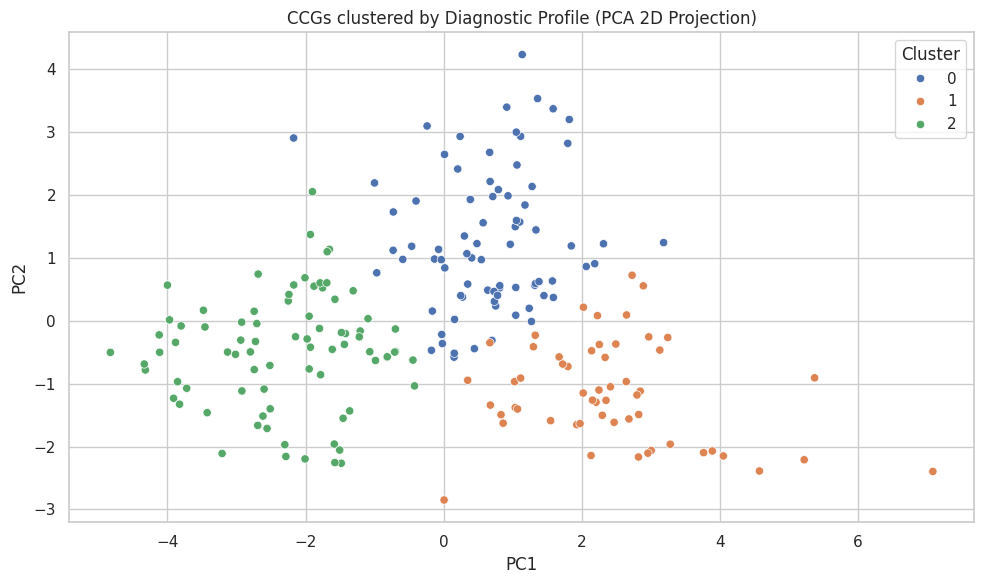

In [26]:
# PCA for 2D visualisation of clusters
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "Cluster": cluster_labels,
    "CCG Name": df_cluster["CCG Name"]
})

plt.figure()
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="deep"
)
plt.title("CCGs clustered by Diagnostic Profile (PCA 2D Projection)")
plt.tight_layout()
plt.show()

Regression dataset shape: (49, 13)
R^2 on test set: 0.998
RMSE on test set: 0.508


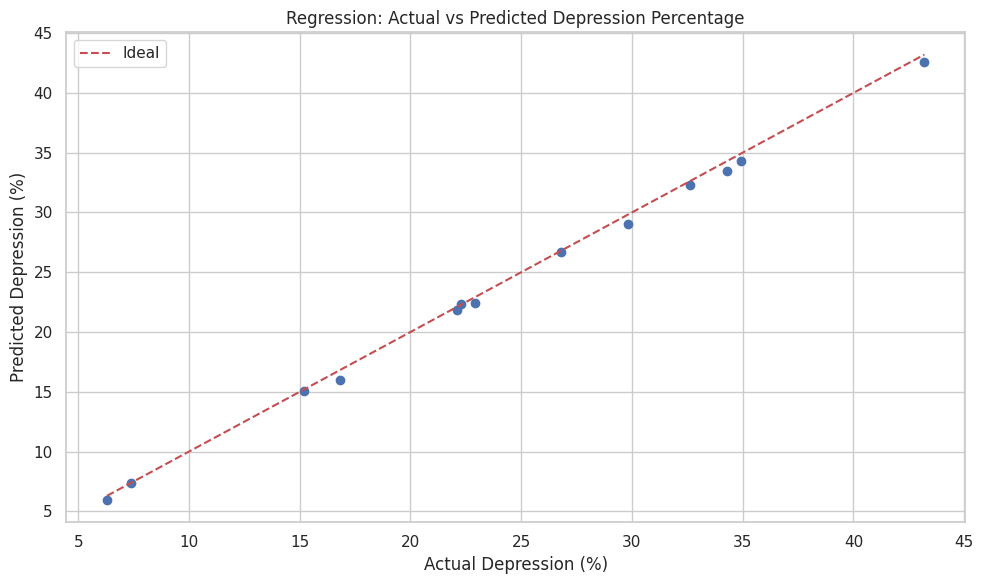

In [27]:
# Prepare regression dataset: drop rows with missing target
reg_df = df.copy()
reg_df = reg_df.dropna(subset=["Depression"])

# Features: all other diagnostic percentages except Depression
reg_features = [c for c in diag_cols if c != "Depression"]
X_reg = reg_df[reg_features].copy()
y_reg = reg_df["Depression"].copy()

# Drop rows with any missing feature values
mask_reg = ~X_reg.isna().any(axis=1)
X_reg = X_reg[mask_reg]
y_reg = y_reg[mask_reg]

print("Regression dataset shape:", X_reg.shape)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42
)

# Fit linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2 on test set: {r2:.3f}")
print(f"RMSE on test set: {rmse:.3f}")

# Coefficients (sorted by absolute magnitude)
coef_df = pd.DataFrame({
    "Feature": X_reg.columns,
    "Coefficient": lin_reg.coef_
}).sort_values("Coefficient", key=lambda s: s.abs(), ascending=False)

coef_df

# %%
# Scatter plot: actual vs predicted Depression%
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Depression (%)")
plt.ylabel("Predicted Depression (%)")
plt.title("Regression: Actual vs Predicted Depression Percentage")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", label="Ideal")
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
# Prepare classification dataset
clf_df = df.copy()
clf_df = clf_df.dropna(subset=["Unspecified"])

# Binary target: 1 if Unspecified > median, else 0
median_unspecified = clf_df["Unspecified"].median()
clf_df["High_Unspecified"] = (clf_df["Unspecified"] > median_unspecified).astype(int)

# Features: all diagnostic percentages except "Unspecified"
clf_features = [c for c in diag_cols if c != "Unspecified"]
X_clf = clf_df[clf_features].copy()
y_clf = clf_df["High_Unspecified"].copy()

# Drop rows with any missing feature values
mask_clf = ~X_clf.isna().any(axis=1)
X_clf = X_clf[mask_clf]
y_clf = y_clf[mask_clf]

print("Classification dataset shape:", X_clf.shape)

# Train/test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_clf, y_clf, test_size=0.25, random_state=42, stratify=y_clf
)

# Standardise features for logistic regression
scaler_clf = StandardScaler()
X_train_c_scaled = scaler_clf.fit_transform(X_train_c)
X_test_c_scaled = scaler_clf.transform(X_test_c)

# Fit logistic regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_c_scaled, y_train_c)

# Predictions
y_pred_c = log_reg.predict(X_test_c_scaled)

# Evaluation
acc = accuracy_score(y_test_c, y_pred_c)
cm = confusion_matrix(y_test_c, y_pred_c)

print(f"Accuracy on test set: {acc:.3f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test_c, y_pred_c))

# %%
# Feature importance (logistic regression coefficients)
clf_coef_df = pd.DataFrame({
    "Feature": X_clf.columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values("Coefficient", key=lambda s: s.abs(), ascending=False)

clf_coef_df.head(15)



Classification dataset shape: (49, 13)
Accuracy on test set: 0.538

Confusion Matrix:
[[5 3]
 [3 2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.40      0.40      0.40         5

    accuracy                           0.54        13
   macro avg       0.51      0.51      0.51        13
weighted avg       0.54      0.54      0.54        13



,Feature,Coefficient
3,Generalized anxiety disorder,-1.057940
1,Anxiety and stress related disorders (Total),-1.014878
7,Panic disorder (episodic paroxysmal anxiety),-0.834571
10,Specific (isolated) phobias,-0.761582
0,Depression,-0.736903
9,Social phobias,-0.594405
8,Post-traumatic stress disorder,-0.444635
6,Other anxiety or stress related disorder,-0.404120
5,Obsessive-compulsive disorder,-0.295663
4,Mixed anxiety and depressive disorder,-0.282845
